# Fist Reduced Quantum Genetic Algorithm

In [426]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from collections import Counter
import numpy as np

[0.23407574 0.34557554 0.70661032 0.46881679 0.34976353 0.68225662]


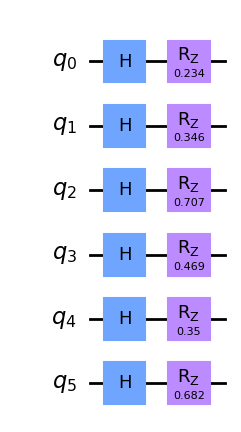

In [427]:
n = 6

circuit = QuantumCircuit(n)
circuit.h(range(n))
rand_theta = np.random.uniform(0, 2*np.pi/n, n)
print(rand_theta)
for i in range(n):
    circuit.rz(rand_theta[i], i)

circuit.draw(output = "mpl")

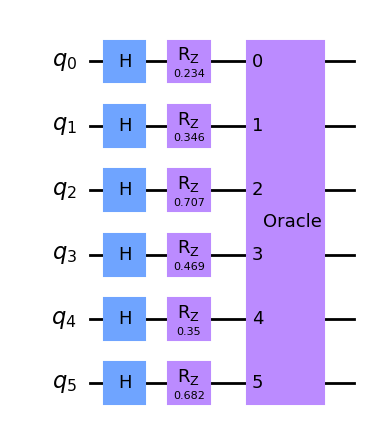

In [428]:
expected = 8

oracle = np.identity(2**n)
oracle[expected][expected] = -1

circuit.unitary(oracle, range(n), label='Oracle')
circuit.draw(output = "mpl")

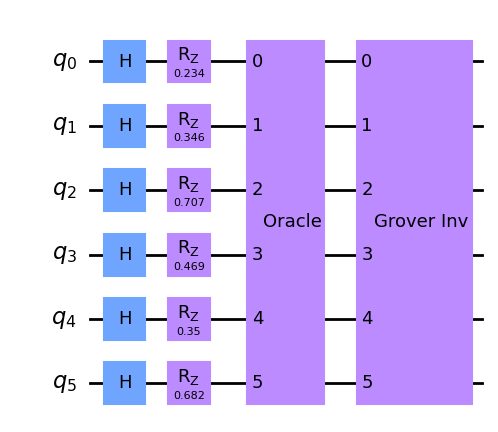

In [429]:
def ia(size):
    ia_mat=2*np.ones(size)/size
    ia_mat=ia_mat-np.identity(size)
    return ia_mat
GIM = ia(2**n)
circuit.unitary(GIM,range(n), label='Grover Inv')

circuit.draw(output = "mpl")

In [430]:
circuit.measure_all()

Counter({'001000': 834, '000000': 500, '111111': 446, '000001': 390, '000010': 327, '111110': 326, '010000': 313, '101111': 297, '111101': 266, '110111': 257, '000011': 233, '010001': 220, '101110': 202, '010010': 197, '000100': 193, '001001': 192, '111100': 192, '011111': 184, '100000': 183, '110110': 177, '101101': 174, '111011': 174, '011000': 157, '000101': 149, '001010': 144, '110101': 135, '100111': 125, '010011': 117, '011110': 115, '100001': 114, '101100': 114, '000110': 98, '111010': 97, '010100': 95, '110000': 92, '011001': 92, '001011': 90, '001111': 90, '110100': 89, '101000': 88, '011101': 87, '111001': 83, '011010': 82, '100010': 81, '001100': 80, '111000': 80, '100011': 78, '010111': 78, '011100': 77, '100110': 76, '001101': 76, '011011': 73, '101011': 71, '110011': 71, '110010': 70, '010101': 68, '110001': 66, '100101': 66, '001110': 66, '100100': 62, '010110': 60, '101001': 59, '000111': 56, '101010': 56})


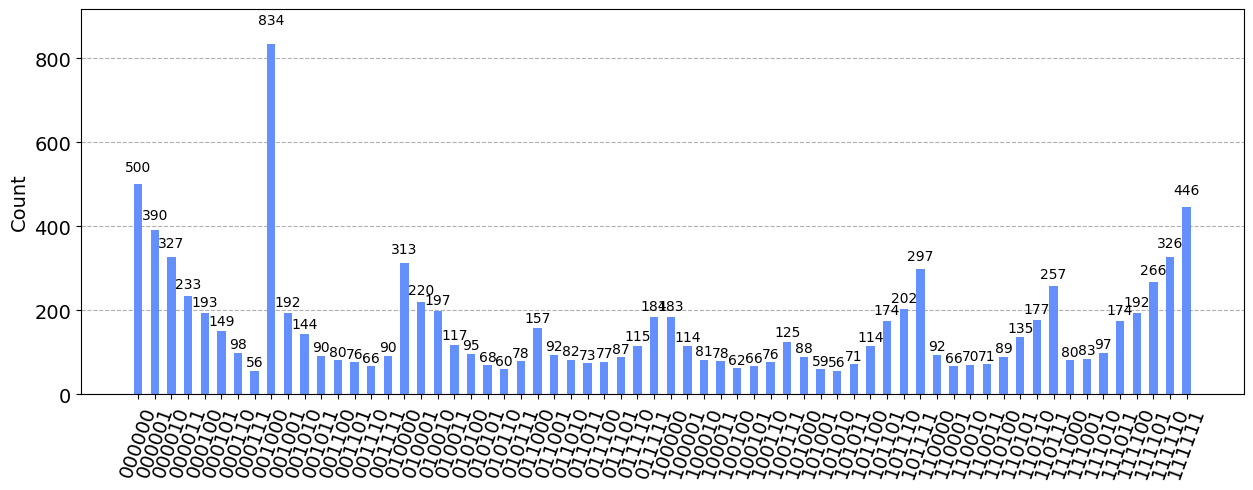

In [431]:
sim = Aer.get_backend('qasm_simulator')
result = Counter(execute(circuit,backend=sim,shots=10000).result().get_counts())
print(result)
plot_histogram(result, figsize=(15, 5))